In [3]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
import sweetviz as sv
from sklearn.metrics import accuracy_score
#!pip
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import networkx as nx

In [5]:
DS = pd.read_csv('/Users/ronikriger/Downloads/data_date.csv', index_col = 0)

In [6]:
DS.head()

,Country,Status,AQI Value
Date,,,
2022-07-21,Albania,Good,14
2022-07-21,Algeria,Moderate,65
2022-07-21,Andorra,Moderate,55
2022-07-21,Angola,Unhealthy for Sensitive Groups,113
2022-07-21,Argentina,Moderate,63


In [7]:
DS.columns

Index(['Country', 'Status', 'AQI Value'], dtype='object')

In [8]:
DS.shape

(7048, 3)

In [9]:
DS.count()

Country      7048
Status       7048
AQI Value    7048
dtype: int64

In [10]:
DS.info

<bound method DataFrame.info of                Country                          Status  AQI Value
Date                                                             
2022-07-21     Albania                            Good         14
2022-07-21     Algeria                        Moderate         65
2022-07-21     Andorra                        Moderate         55
2022-07-21      Angola  Unhealthy for Sensitive Groups        113
2022-07-21   Argentina                        Moderate         63
...                ...                             ...        ...
2022-09-02  Uzbekistan  Unhealthy for Sensitive Groups        101
2022-09-02     Vatican                            Good         30
2022-09-02   Venezuela                            Good          8
2022-09-02     Vietnam  Unhealthy for Sensitive Groups        124
2022-09-02      Zambia                        Moderate         77

[7048 rows x 3 columns]>

In [11]:
DS.max()

Country              Zambia
Status       Very Unhealthy
AQI Value               868
dtype: object

In [12]:
import pyprind
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure


import xgboost as xgb
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import nltk
import wordcloud
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import re


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ronikriger/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ronikriger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
sentence = DS['Status']

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



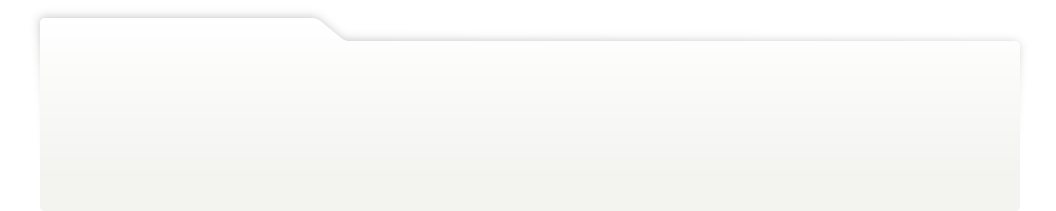
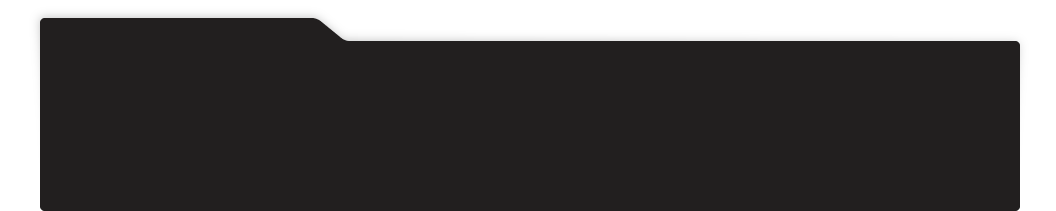
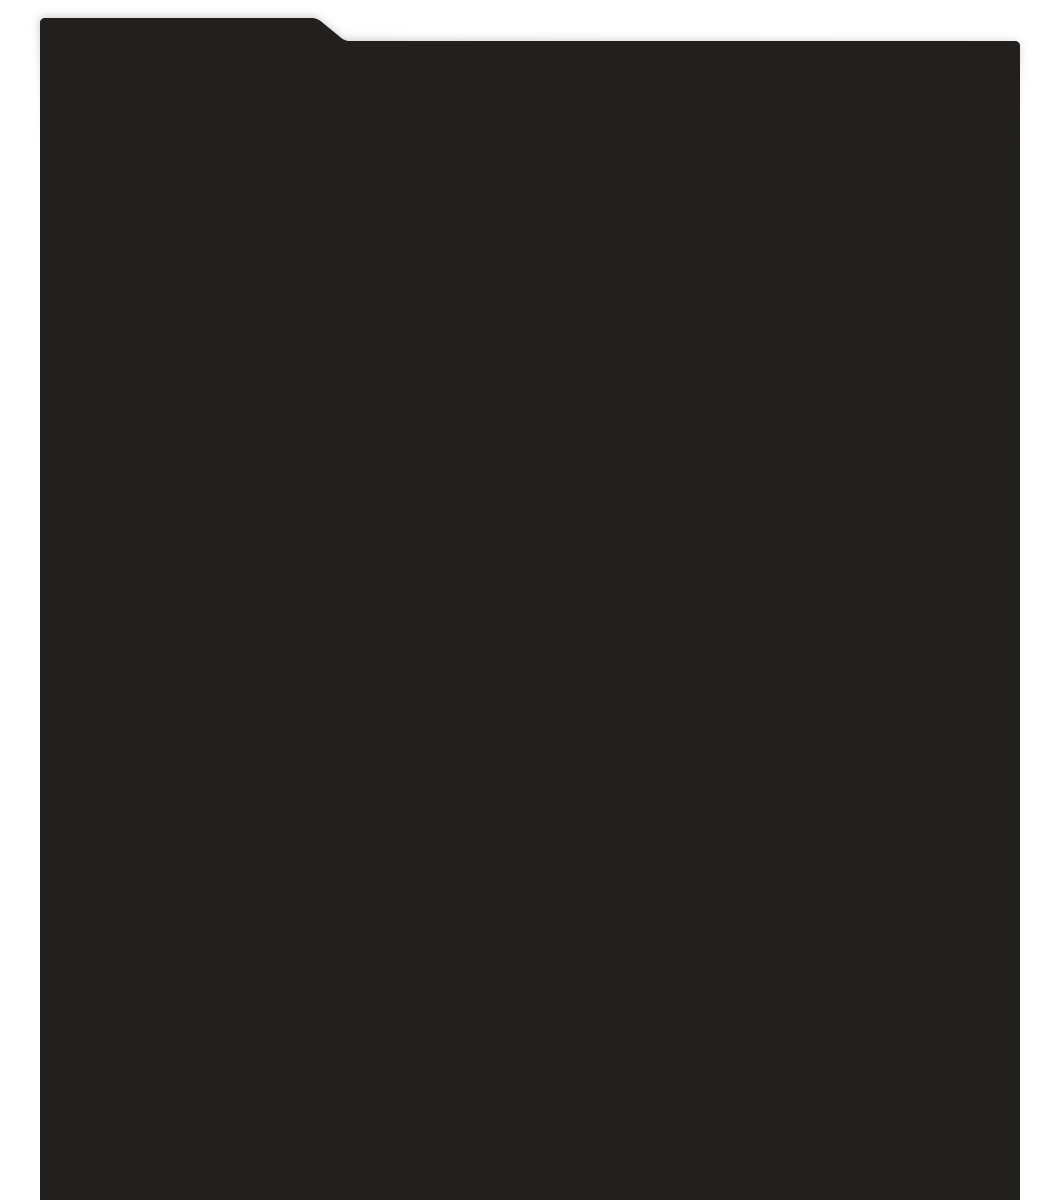
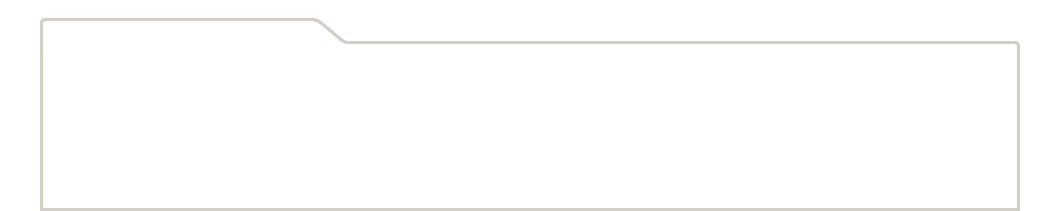
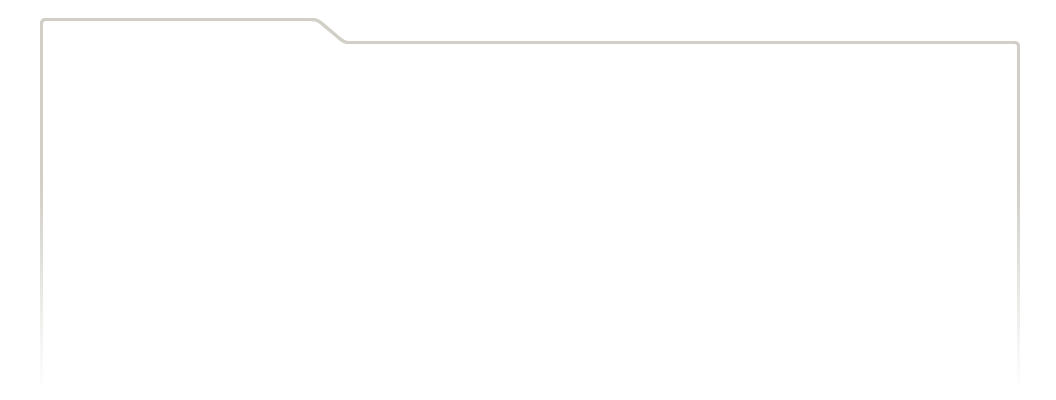
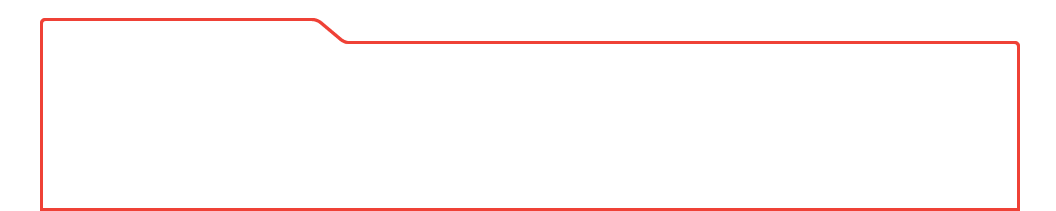
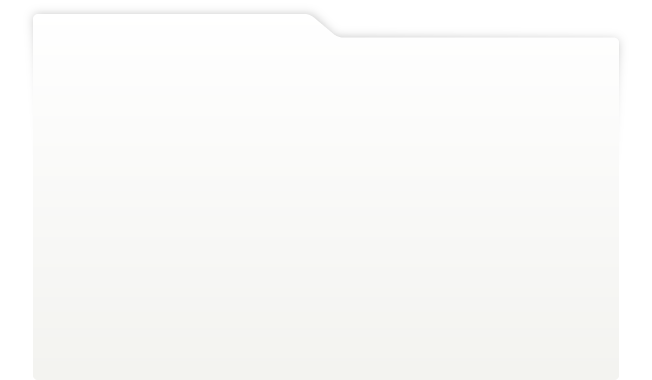
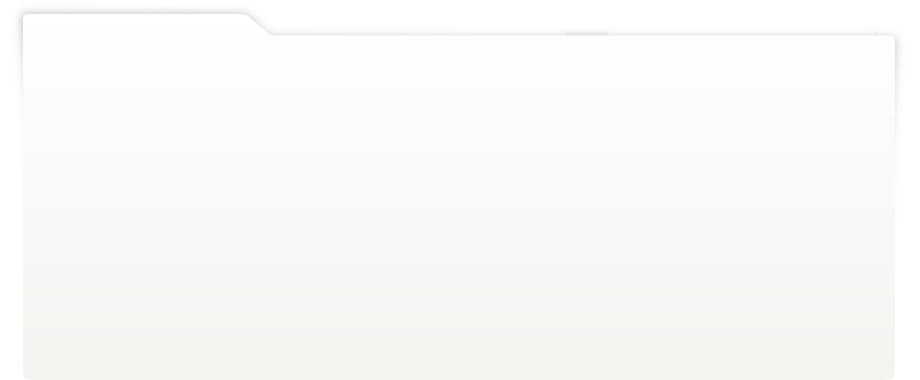
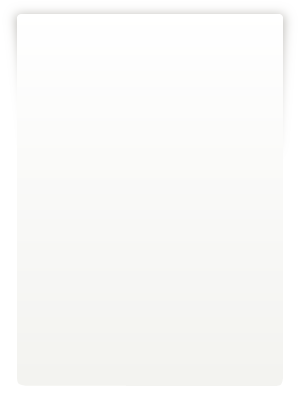
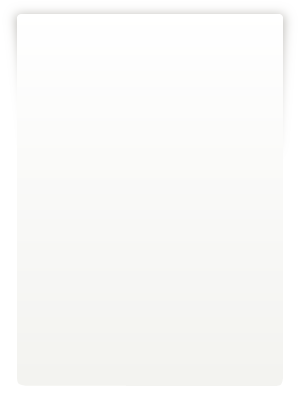
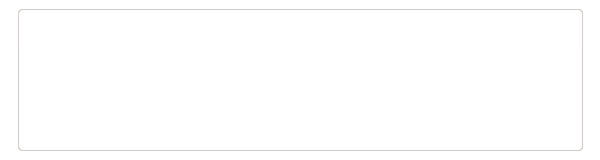
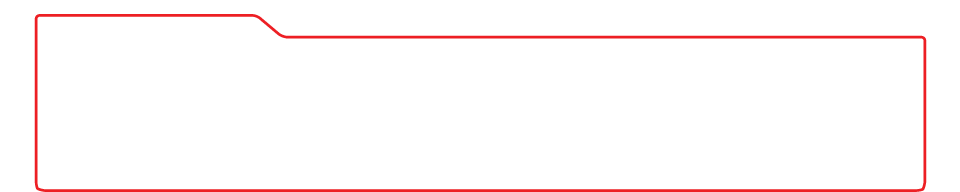
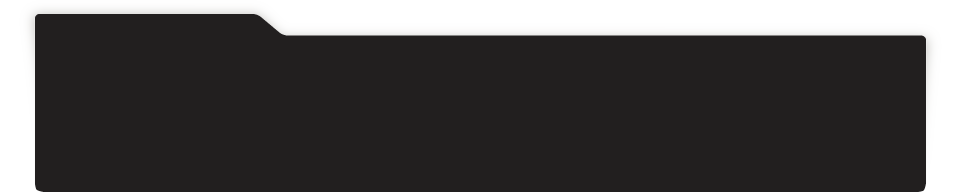
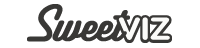
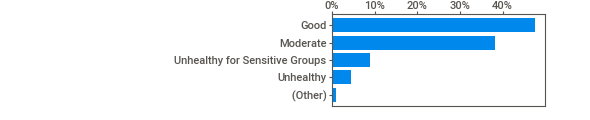
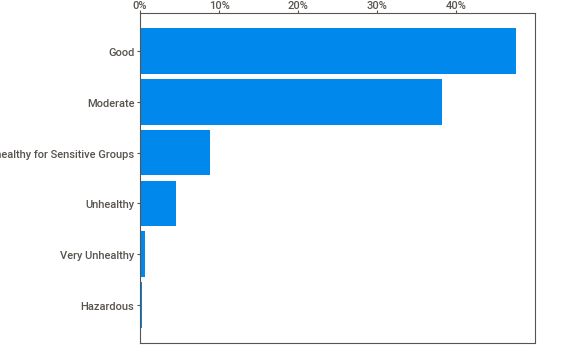
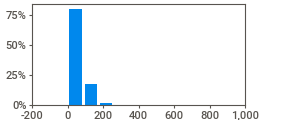
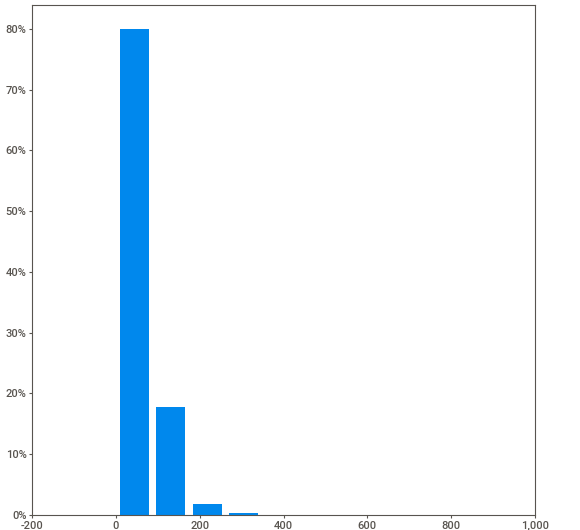
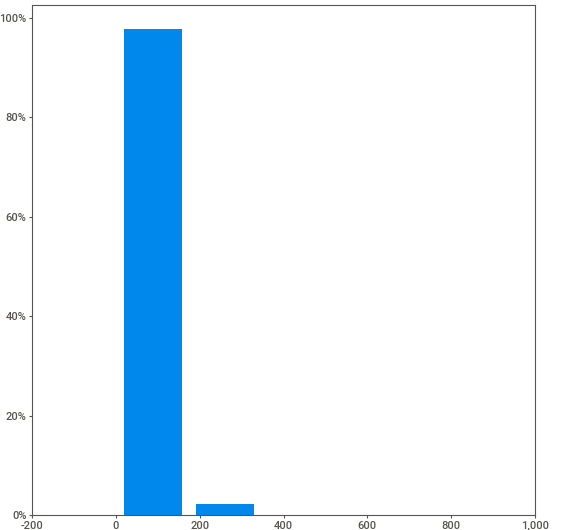
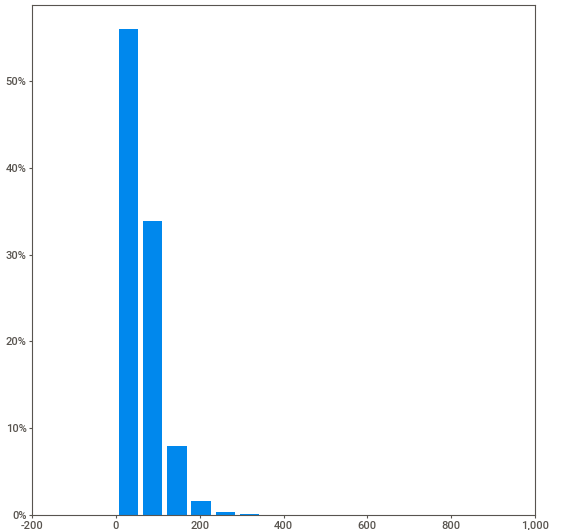
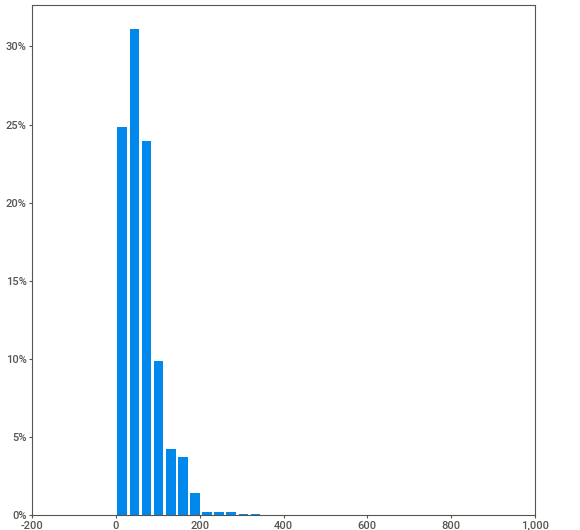
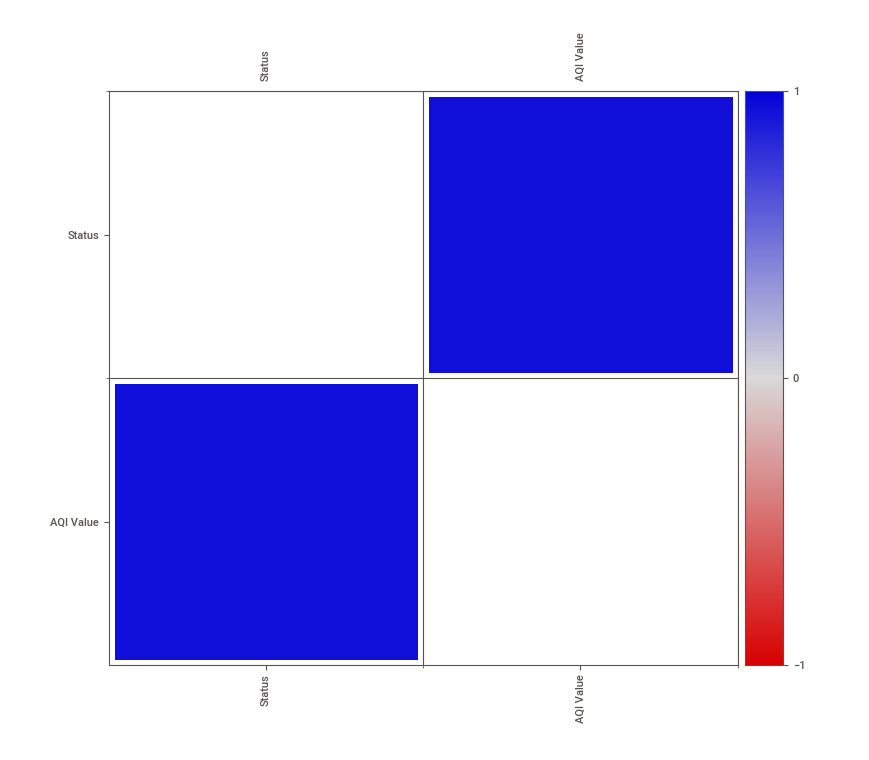
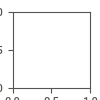

In [14]:
import sweetviz as sv
analyze_report = sv.analyze(DS)
analyze_report.show_html('analyze.html', open_browser=False)
import IPython
IPython.display.HTML('analyze.html')

In [15]:
#Generating Pandas_Profiling Report
from pandas_profiling import ProfileReport
prof = ProfileReport(DS)
prof.to_file(output_file='analyze.html')

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
#Checking that our data is cleaned and ready to train
print('check the nan value in the DS data')
print(DS.isnull().sum())

check the nan value in the DS data
Country      0
Status       0
AQI Value    0
dtype: int64


In [17]:
def dummy_variables(DS, columns, prefixes):
    DS = DS.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(DS[column], prefix=prefix)
        DS = pd.concat([DS, dummies], axis=1)
        DS = DS.drop(column, axis=1) 
    return DS

In [18]:
DS = dummy_variables(DS, ['Country', 'Status', 'AQI Value'],['ct','st','aqi'])

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as snsfrom 
from sklearn.datasets import load_iris


In [20]:
iris = load_iris()

In [21]:
x, y = iris.data, iris.target

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [25]:
y_pred = logreg.predict(x_test)

--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 1.000


Text(0.5, 1.05, 'Confusion_matrix')

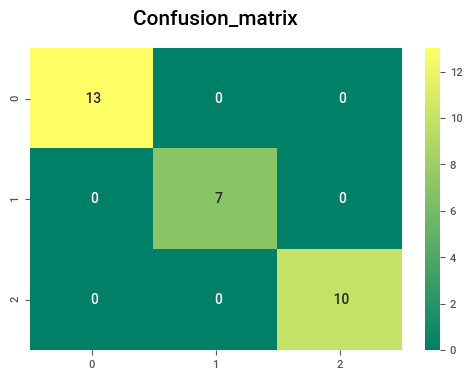

In [26]:
from sklearn.metrics import confusion_matrix
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(x_test, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 1.00


Text(0.5, 1.05, 'Confusion_matrix')

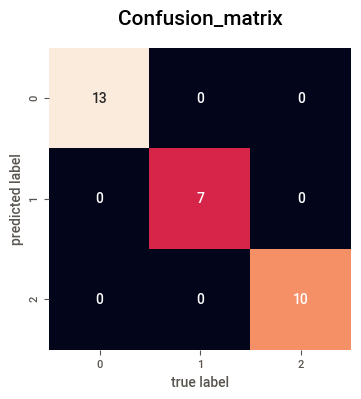

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=2,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rf_model.fit(x_train,y_train)
y_pred_rm=rf_model.predict(x_test)
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf_model.score(x_test, y_test)))

mat=confusion_matrix(y_test,y_pred_rm)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion_matrix', y=1.05, size=15)

In [28]:
from sklearn.metrics import classification_report
models = [logreg, rf_model]
print('Comparing the Models')
for model in models:
    model.fit(x_train, y_train) # fit the model
    y_pred= model.predict(x_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

Comparing the Models
The accuracy of model LogisticRegression is 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The accuracy of model RandomForestClassifier is 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30





In [29]:
import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [30]:

dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {'learning_rate': 0.001, 'max_depth': 6, 'lambda': 0.01}
model = xgb.train(params, dtrain, num_boost_round=10000, evals=[(dval, 'eval')], early_stopping_rounds=10);


NameError: name 'x_val' is not defined